In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## Mission 1. Netflix and Code

1. [넷플릭스 데이터 링크](https://www.kaggle.com/datasets/shivamb/netflix-shows)를 활용
2. 한국 작품은 총 얼마나 있는지?
3. 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는지?

In [2]:
# 넷플릭스 데이터 불러오기
netflix_df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/netflix_titles.csv')
print(netflix_df.shape)
netflix_df.head(3)

(6234, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


In [3]:
# 한국 작품의 수
korea_content_num = netflix_df.query("country == 'South Korea'").shape[0]

print(f"한국 작품의 수: {korea_content_num}")
netflix_df.query("country == 'South Korea'").head(3)

한국 작품의 수: 136


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
71,80187061,Movie,The Mayor,Park In-je,"Min-sik Choi, Do-won Kwak, Eun-kyung Shim, So-...",South Korea,"September 30, 2017",2017,TV-MA,130 min,"Dramas, International Movies","With the presidency in mind, the incumbent may..."
146,81095101,TV Show,Vagabond,NaN,"Lee Seung-gi, Bae Suzy, Shin Sung-rok, Moon Ju...",South Korea,"September 21, 2019",2019,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Ac...","When his nephew dies in a plane crash, stunt m..."
190,81144925,TV Show,When the Camellia Blooms,NaN,"Kong Hyo-jin, Kang Ha-neul, Kim Ji-seok, Oh Ju...",South Korea,"September 18, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Dongbaek is a single mother. When a potential ...


In [4]:
country_contents = netflix_df.groupby('country').count()[['show_id']]
country_contents = country_contents.sort_values('show_id')
country_contents.tail(5)

,show_id
country,
Canada,141
Japan,176
United Kingdom,348
India,777
United States,2032


In [5]:
# index에 ','가 들어간 것들은 단일 국가가 아님
print(country_contents[country_contents.index.str.contains(',')].index, '\n')

# 따라서 index에 ','가 들어가지 않은 국가들만 포함하여 결과 도출
print(country_contents[~country_contents.index.str.contains(',')].index, '\n')

new_contents = country_contents[~country_contents.index.str.contains(',')]
print(new_contents.shape)
new_contents.tail(3)

Index(['New Zealand, United Kingdom, Australia',
       'Spain, United Kingdom, United States', 'Spain, United Kingdom',
       'Spain, Switzerland', 'Spain, Portugal', 'Spain, Mexico, France',
       'Spain, Italy, Argentina', 'Spain, Germany', 'Spain, France, Uruguay',
       'Spain, France, Italy',
       ...
       'United States, Australia', 'United States, Germany',
       'United States, Japan', 'China, Hong Kong', 'Hong Kong, China',
       'France, Belgium', 'United States, United Kingdom',
       'Canada, United States', 'United States, Canada',
       'United Kingdom, United States'],
      dtype='object', name='country', length=492) 

Index(['Saudi Arabia', 'Venezuela', 'West Germany', 'Croatia', 'Finland',
       'Dominican Republic', 'Cambodia', 'Bulgaria', 'Guatemala', 'Ghana',
       'Georgia', 'Hungary', 'Ukraine', 'Bangladesh', 'Uruguay', 'Switzerland',
       'Austria', 'Iceland', 'Peru', 'Romania', 'Vietnam',
       'United Arab Emirates', 'Lebanon', 'South Africa',

,show_id
country,
United Kingdom,348
India,777
United States,2032


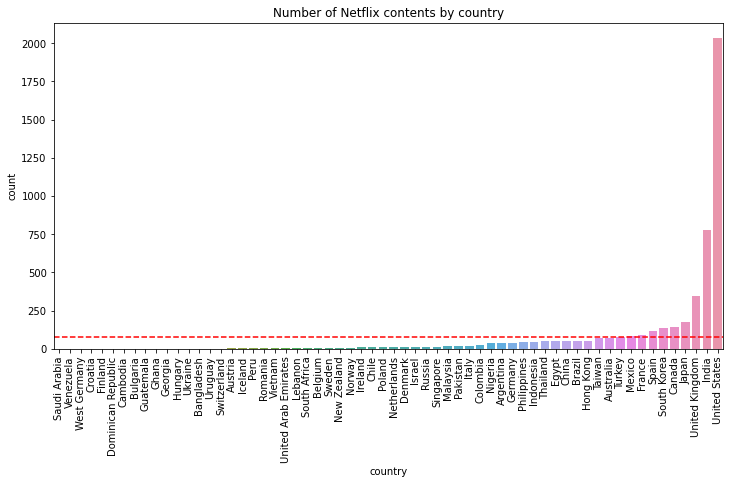

In [6]:
# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=new_contents, x=new_contents.index, y="show_id")
plt.axhline(new_contents['show_id'].mean(), color='r', linestyle='--') # 평균선 추가
plt.title("Number of Netflix contents by country") ; plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

## Mission 2. 가상화폐 가즈아!

1. [비트코인 데이터 링크](https://www.kaggle.com/datasets/rishidamarla/bitcoin-prices-20112015)를 활용
2. [이더리움 데이터 링크](https://www.kaggle.com/datasets/prasoonkottarathil/ethereum-historical-dataset?select=ETH_day.csv)를 활용
3. 비트코인의 2016.6 ~ 2017.6 기간의 5일 이동평균선 (5-MA, Moving Average) 비트코인 가격 그래프 그리기
4. 이더리움의 2016.6 ~ 2017.6 기간의 5일 이동평균선 (5-MA, Moving Average) 이더리움 가격 그래프 그리기
5. 비트코인과 이더리움 그래프를 함께 비교

In [7]:
# 비트코인 데이터 불러오기
bitcoin_df = pd.read_csv('/Users/paul/Desktop/BitCoin.csv', index_col=0)
bitcoin_df['Date'] = bitcoin_df['Date'].astype('datetime64')
bitcoin_df = bitcoin_df.loc[list(reversed(bitcoin_df.index)), ].reset_index(drop=True)

print(bitcoin_df.shape)
bitcoin_df.head(20)

(1609, 7)


,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,7806647.629,1500520000
1,2013-04-29,134.44,147.49,134.00,144.54,7757951.030,1491160000
2,2013-04-30,144.00,146.93,134.05,139.00,8312655.246,1597780000
3,2013-01-05,139.00,139.89,107.72,116.99,8026718.801,1542820000
4,2013-02-05,116.38,125.60,92.28,105.21,6722784.102,1292190000
5,2013-03-05,106.25,108.13,79.10,97.75,6139465.431,1180070000
6,2013-04-05,98.10,115.00,92.50,112.50,5670292.422,1089890000
7,2013-05-05,112.90,118.80,107.14,115.91,6528049.729,1254760000
8,2013-06-05,115.98,124.66,106.64,112.30,6708632.953,1289470000
9,2013-07-05,112.25,113.44,97.70,111.50,6495325.198,1248470000


- Problem -> 데이터가 이상함
     - 매월 1일~12일인 경우, Year-month-date가 아닌 Year-date-month로 표기됨
     - 따라서 데이터의 Date 열을 수정해야 함

In [8]:
start_date = pd.to_datetime(bitcoin_df.head(1)['Date'].values[0])
end_date = pd.to_datetime(bitcoin_df.tail(1)['Date'].values[0])
dates = pd.date_range(start_date, end_date, freq='D') # 일 단위
print(len(dates)) # 기존 데이터프레임의 행의 개수와 동일

bitcoin_df['Date'] = dates
bitcoin_df.sort_values('Date', inplace=True)
bitcoin_df.set_index('Date', inplace=True)

print(bitcoin_df.shape)
bitcoin_df.head(20) # 데이터가 정상으로 나온 것 확인!

1609
(1609, 6)


,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,7806647.629,1500520000
2013-04-29,134.44,147.49,134.00,144.54,7757951.030,1491160000
2013-04-30,144.00,146.93,134.05,139.00,8312655.246,1597780000
2013-05-01,139.00,139.89,107.72,116.99,8026718.801,1542820000
2013-05-02,116.38,125.60,92.28,105.21,6722784.102,1292190000
2013-05-03,106.25,108.13,79.10,97.75,6139465.431,1180070000
2013-05-04,98.10,115.00,92.50,112.50,5670292.422,1089890000
2013-05-05,112.90,118.80,107.14,115.91,6528049.729,1254760000
2013-05-06,115.98,124.66,106.64,112.30,6708632.953,1289470000


In [9]:
bitcoin_df.isna().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [10]:
# 비트코인의 5일 이동평균선 데이터
df = bitcoin_df[['Open']].rolling(window=5).mean()
bitcoin_5MA_df = pd.DataFrame(df[df.index >= '2016-06-01'])
bitcoin_5MA_df

,Open
Date,
2016-06-01,518.856
2016-06-02,531.552
2016-06-03,533.592
2016-06-04,541.840
2016-06-05,549.664
...,...
2017-09-18,3575.358
2017-09-19,3615.042
2017-09-20,3765.054


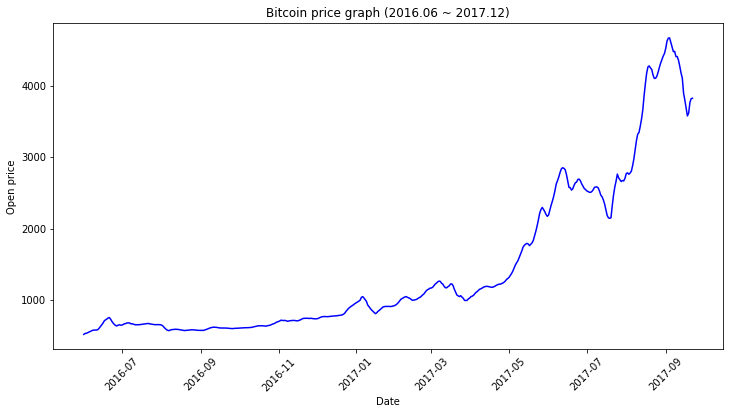

In [11]:
# 비트코인 시각화 - 노란색이 잘 안보여서 파란색으로 수정
plt.figure(figsize=(12, 6))
sns.lineplot(data=bitcoin_5MA_df, x=bitcoin_5MA_df.index, y="Open", color='blue')
plt.title("Bitcoin price graph (2016.06 ~ 2017.12)") 
plt.xlabel('Date') ; plt.ylabel('Open price')
plt.xticks(rotation=45)
plt.show()

In [12]:
# 비트코인 데이터 불러오기
ETH_df = pd.read_csv('/Users/paul/Desktop/ETH_day.csv')
ETH_df['Date'] = ETH_df['Date'].astype('datetime64')
ETH_df.sort_values('Date', inplace=True)
ETH_df.reset_index(drop=True, inplace=True)
ETH_df.set_index('Date', inplace=True)

print(ETH_df.shape)
ETH_df.head(3)

(1438, 7)


,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
Date,,,,,,,
2016-05-09,ETHUSD,12.00,12.00,9.36,9.98,1317.90,12885.06
2016-05-10,ETHUSD,9.98,9.98,9.36,9.68,672.06,6578.20
2016-05-11,ETHUSD,9.68,10.47,9.68,10.43,3052.51,30978.11


In [13]:
ETH_df.isna().sum()

Symbol        0
Open          0
High          0
Low           0
Close         0
Volume ETH    0
Volume USD    0
dtype: int64

In [14]:
# 이더리움의 5일 이동평균선 데이터
df = ETH_df[['Open']].rolling(window=5).mean()
ETH_5MA_df = pd.DataFrame(df[(df.index >= '2016-06-01') & (df.index <= '2017-12-09')])
ETH_5MA_df

,Open
Date,
2016-06-01,12.514
2016-06-02,13.026
2016-06-03,13.444
2016-06-04,13.742
2016-06-05,13.982
...,...
2017-12-05,457.174
2017-12-06,462.368
2017-12-07,453.922


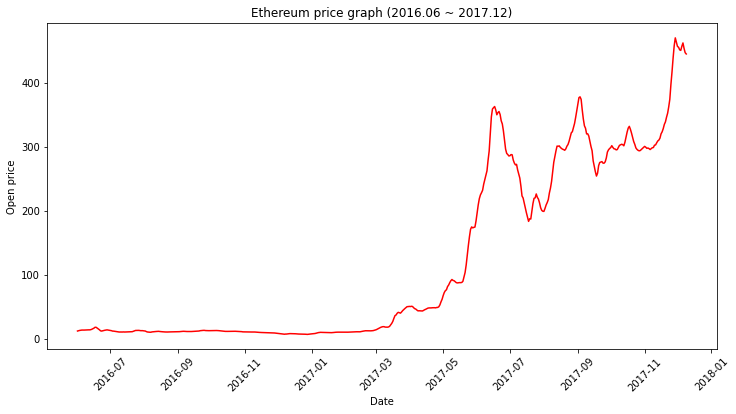

In [15]:
# 이더리움 시각화 - 선 색은 빨간색으로 수정
plt.figure(figsize=(12, 6))
sns.lineplot(data=ETH_5MA_df, x=ETH_5MA_df.index, y="Open", color='red')
plt.title("Ethereum price graph (2016.06 ~ 2017.12)") 
plt.xlabel('Date') ; plt.ylabel('Open price')
plt.xticks(rotation=45)
plt.show()

In [16]:
# 비트코인과 이더리움 합치기
total_df = pd.merge(bitcoin_5MA_df, ETH_5MA_df, left_on=bitcoin_5MA_df.index, right_on=ETH_5MA_df.index)

total_df.columns = ['Date', 'Bitcoin_5MA', 'ETH_5MA']
total_df.set_index('Date', inplace=True)
total_df

,Bitcoin_5MA,ETH_5MA
Date,,
2016-06-01,518.856,12.514
2016-06-02,531.552,13.026
2016-06-03,533.592,13.444
2016-06-04,541.840,13.742
2016-06-05,549.664,13.982
...,...,...
2017-09-18,3575.358,254.482
2017-09-19,3615.042,258.944
2017-09-20,3765.054,270.864


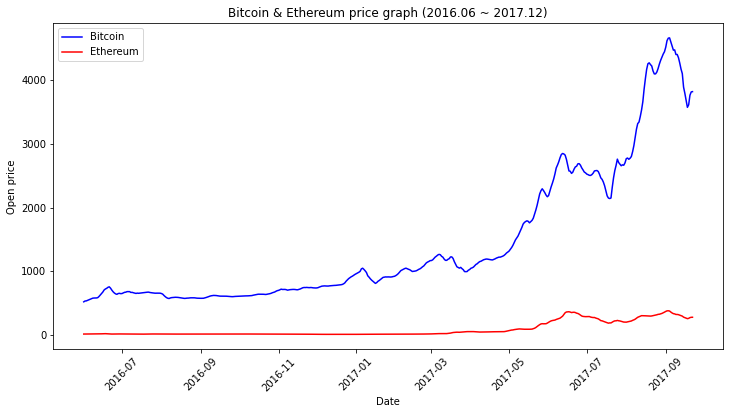

In [17]:
# 비트코인과 이더리움 시각화1 - 비트코인과 이더리움을 하나의 y축 기준으로 그린 경우
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_df, x=total_df.index, y="Bitcoin_5MA", color='blue', label='Bitcoin')
sns.lineplot(data=total_df, x=total_df.index, y="ETH_5MA", color='red', label='Ethereum')
plt.title("Bitcoin & Ethereum price graph (2016.06 ~ 2017.12)") 
plt.xlabel('Date') ; plt.ylabel('Open price') ; plt.legend()
plt.xticks(rotation=45)
plt.show()

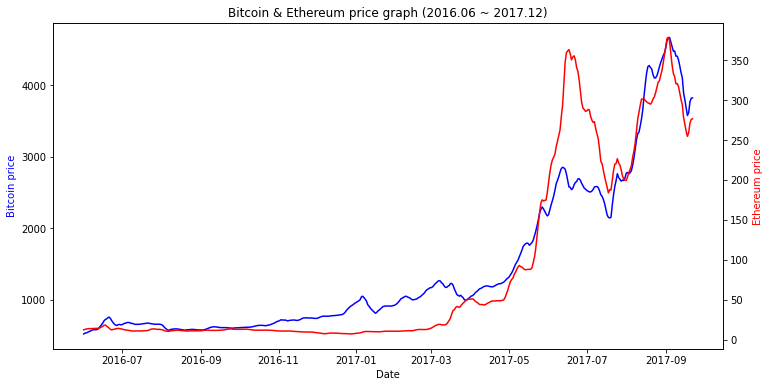

In [18]:
# 비트코인과 이더리움 시각화2 - 비트코인과 이더리움을 각각의 y축 기준으로 그린 경우 (왼쪽 비트코인, 오른쪽 이더리움)
# 이 경우에는 이더리움의 range가 크지 않아서 너무 돋보여보임
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(total_df.index, total_df.Bitcoin_5MA, color="blue")
ax.set_xlabel("Date")
ax.set_ylabel("Bitcoin price", color="blue")

ax2 = ax.twinx()
ax2.plot(total_df.index, total_df.ETH_5MA, color="red")
ax2.set_ylabel("Ethereum price", color="red")
plt.title("Bitcoin & Ethereum price graph (2016.06 ~ 2017.12)") 
plt.show()

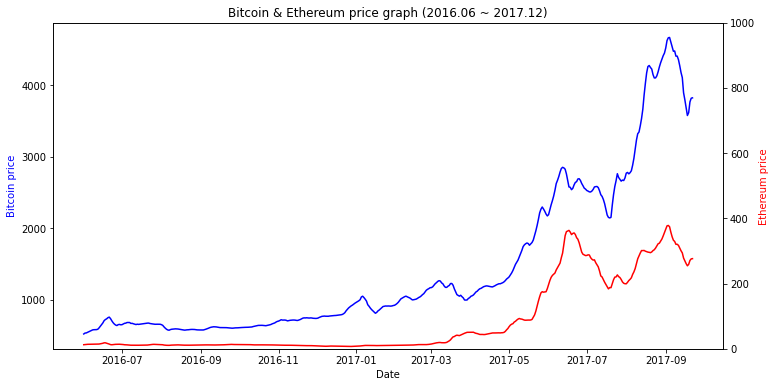

In [19]:
# 비트코인과 이더리움 시각화3 - 비트코인과 이더리움을 각각의 y축 기준으로 그린 경우 (왼쪽 비트코인, 오른쪽 이더리움)
# 이더리움의 range를 조금 수정
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(total_df.index, total_df.Bitcoin_5MA, color="blue")
ax.set_xlabel("Date")
ax.set_ylabel("Bitcoin price", color="blue")

ax2 = ax.twinx()
ax2.plot(total_df.index, total_df.ETH_5MA, color="red")
ax2.set_ylim([0, 1000])
ax2.set_ylabel("Ethereum price", color="red")
plt.title("Bitcoin & Ethereum price graph (2016.06 ~ 2017.12)") 
plt.show()